In [7]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#Importing the dataset
dataset = pd.read_csv('D:\\DATA SCIENCE\\Data Sets\\EXCEL FILES\\Mall_Customers.csv')
X = dataset.iloc[:,[3,4]].values

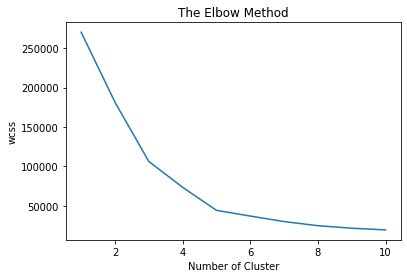

In [10]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show()

In [11]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

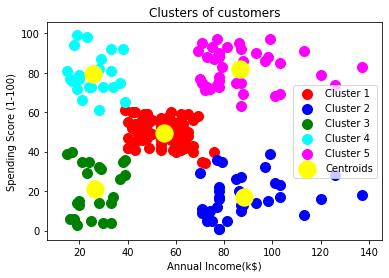

In [12]:
#visualizing the clusters
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0, 1], s=100, c= 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1, 1], s=100, c= 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2, 1], s=100, c= 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3, 1], s=100, c= 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4, 1], s=100, c= 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [13]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

#generate the linkage matrix
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))
c

0.7179298392392908

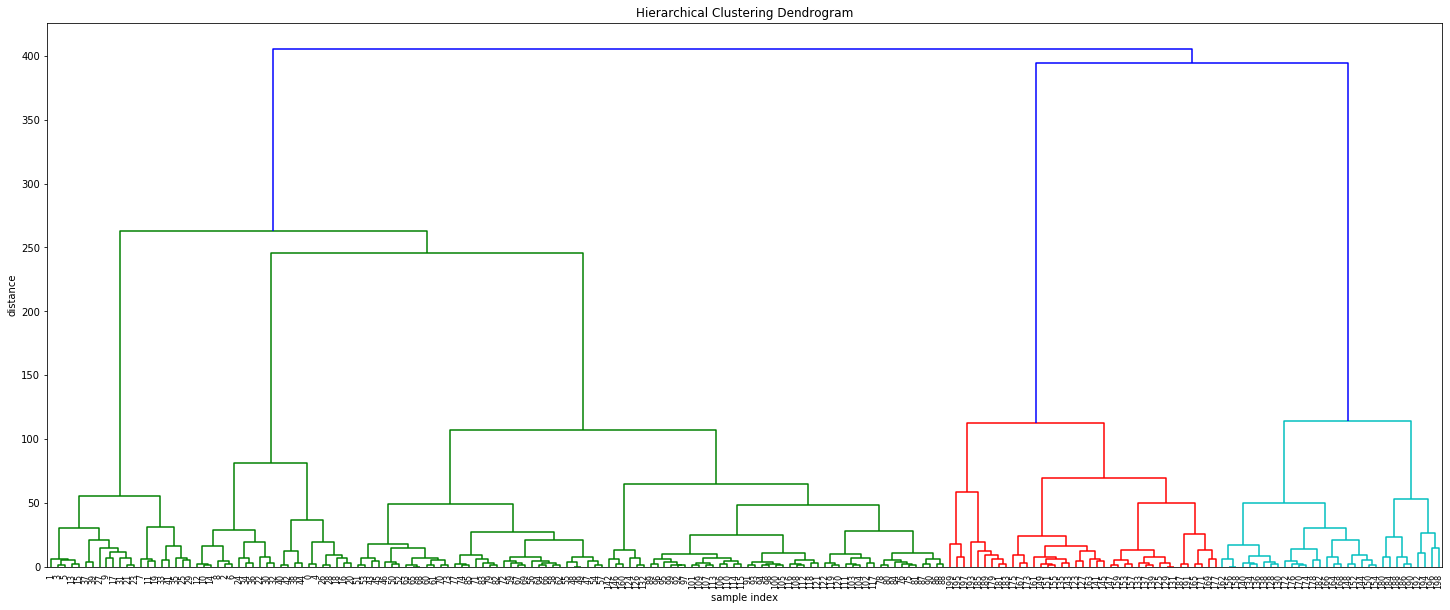

In [14]:
plt.figure(figsize =(25,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90., # rotates the x axis labels
    leaf_font_size=8., #font size for the x axis labels
)
plt.show()

In [16]:
#def fancy_dendrogram(*args, **kwargs):
    #max_d = kwargs.pop('max_d', None)
    #if max_d and 'color_threshold' not in kwargs:
        #kwargs['color_threshold'] = max_d
    #annotate_above = kwargs.pop('annotate_above', 0)
#fancy_dendrogram(
    #Z,
    #truncate_mode='lastp',
    #p=12,
    #leaf_rotation=90.,
    #leaf_font_size=12.,
    #show_contracted=True,
    #annotate_above=10,
    #max_d=50) # plot a horizontal cut-off line
#plt.show()